**Load the libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
import nltk
from nltk.stem import PorterStemmer,WordNetLemmatizer
import regex as re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk
#nltk.download('punkt')
nltk.download('wordnet')
#nltk.download('averaged_perceptron_tagger')
nltk.download('stopwords')


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
pip install "texthero==1.0.5"

In [ ]:
pip install unidecode

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.5/235.5 kB 4.2 MB/s eta 0:00:00


**READ DATASET**

In [ ]:
columns = ['Tweet_ID', 'Sentiment', 'Tweet_Text']

years = [2013] # Assuming files are named from 1 to 11

# Define the list to store training DataFrames
train_dfs = []

# Define the list to store dev DataFrames
dev_dfs = []
# Define the list to store test DataFrames
test_dfs = []
combined_dfs = []

In [ ]:
for year in years:
    train_file_path = f'./twitter-{year}train-A.txt'
    dev_file_path = f'./twitter-{year}dev-A.txt'
    test_file_path = f'./twitter-{year}test-A.txt'

    # Read the training data file into a DataFrame
    train_df = pd.read_csv(train_file_path, sep='\t', names=columns)
    # Read the dev data file into a DataFrame
    dev_df = pd.read_csv(dev_file_path, sep='\t', names=columns)
    # Read the test data file into a DataFrame

    test_df = pd.read_csv(test_file_path, sep='\t',  names=columns)

    # Append the DataFrames to the list
    combined_dfs.append(train_df)
    combined_dfs.append(dev_df)
    combined_dfs.append(test_df)

# Concatenate all DataFrames into a single DataFrame
df= pd.concat(combined_dfs, ignore_index=True)


df.head(4)

,Tweet_ID,Sentiment,Tweet_Text
0,264183816548130816,positive,Gas by my house hit $3.39!!!! I\u2019m going t...
1,263405084770172928,negative,Theo Walcott is still shit\u002c watch Rafa an...
2,262163168678248449,negative,its not that I\u2019m a GSP fan\u002c i just h...
3,264249301910310912,negative,Iranian general says Israel\u2019s Iron Dome c...


In [ ]:
df.count()

Tweet_ID      14885
Sentiment     14885
Tweet_Text    14885
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14885 entries, 0 to 14884
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Tweet_ID    14885 non-null  int64 
 1   Sentiment   14885 non-null  object
 2   Tweet_Text  14885 non-null  object
dtypes: int64(1), object(2)
memory usage: 349.0+ KB


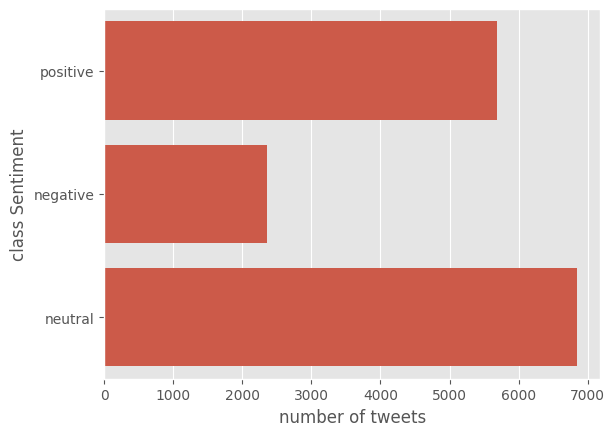

In [ ]:
sns.countplot(df.Sentiment,)
plt.xlabel('number of tweets')
plt.ylabel('class Sentiment')
plt.show()

In [ ]:
#we need to check the data if it is evenly distributed to avoid bias in learning model
neg = df['Sentiment'][df.Sentiment=='negative']
neu = df['Sentiment'][df.Sentiment=='neutral']
pos = df['Sentiment'][df.Sentiment=='positive']

print(len(neg))
print(len(pos))
print(len(neu))
print(df.shape)

2357
5690
6838
(14885, 3)


**Preprocessing Tweet Text**

In [ ]:
import texthero as hero

In [ ]:
#Word count per sentence
def word_count(text):
    return len(text.split())


df['wordcount'] = df['Tweet_Text'].apply(word_count)
#test['wordcount'] = test['Tweet_Text'].apply(word_count)

df.head(5)

,Tweet_ID,Sentiment,Tweet_Text,wordcount
0,264183816548130816,positive,Gas by my house hit $3.39!!!! I\u2019m going t...,14
1,263405084770172928,negative,Theo Walcott is still shit\u002c watch Rafa an...,14
2,262163168678248449,negative,its not that I\u2019m a GSP fan\u002c i just h...,16
3,264249301910310912,negative,Iranian general says Israel\u2019s Iron Dome c...,22
4,262682041215234048,neutral,Tehran\u002c Mon Amour: Obama Tried to Establi...,21


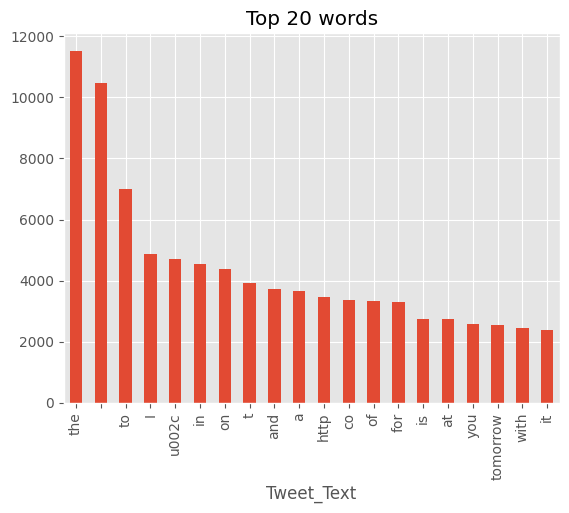

In [ ]:
#Now lets find the most common word being used in the tweet text
NUM_TOP_WORDS = 20

top_20 = hero.visualization.top_words(df['Tweet_Text']).head(NUM_TOP_WORDS)

# Draw the bar chart

top_20.plot.bar(rot=90, title="Top 20 words");

plt.show(block=True);

In [ ]:
text=df['Tweet_Text'].values.tolist()
#text_test=test['Tweet_Text'].values.tolist()
#text+=text_test

**Text cleaned**

In [ ]:
import nltk
stopword=nltk.corpus.stopwords.words('english')
stopword.remove('not')
pt=PorterStemmer()
wordnet=WordNetLemmatizer()
for index,text_ in enumerate(text):
    text_=re.sub(r'@[\w]*','',text_) #Removing Twitter Handles (@user)
    text_=re.sub(r'http/S+','',text_) #Removing urls from text
    text_=re.sub(r'[^A-Za-z#]',' ',text_) #Removing Punctuations, Numbers, and Special Characters
    text_=" ".join(i.lower() for i in text_.split() if i.lower() not in stopword) #Removing stopword
    text_=" ".join(pt.stem(i) for i in text_.split()) #Stemming the word
    text_=" ".join(wordnet.lemmatize(i) for i in text_.split())
    text[index]=text_

In [ ]:
df['Clean_Tweet']=text[:len(df)]
df['length_tweet']=df['Clean_Tweet'].str.len()
#test['preprocess_tweet']=text[len(df):]
df.head(10)

,Tweet_ID,Sentiment,Tweet_Text,wordcount,Clean_Tweet,length_tweet
0,264183816548130816,positive,Gas by my house hit $3.39!!!! I\u2019m going t...,14,ga hous hit u go chapel hill sat,32
1,263405084770172928,negative,Theo Walcott is still shit\u002c watch Rafa an...,14,theo walcott still shit u c watch rafa johnni ...,59
2,262163168678248449,negative,its not that I\u2019m a GSP fan\u002c i just h...,16,not u gsp fan u c hate nick diaz u wait februari,48
3,264249301910310912,negative,Iranian general says Israel\u2019s Iron Dome c...,22,iranian gener say israel u iron dome u deal mi...,78
4,262682041215234048,neutral,Tehran\u002c Mon Amour: Obama Tried to Establi...,21,tehran u c mon amour obama tri establish tie m...,102
5,264229576773861376,neutral,I sat through this whole movie just for Harry ...,14,sat whole movi harri ron christma ohlawd,40
6,264105751826538497,positive,with J Davlar 11th. Main rivals are team Polan...,24,j davlar th main rival team poland hope make s...,82
7,264094586689953794,negative,Talking about ACT\u2019s && SAT\u2019s\u002c d...,23,talk act u sat u u c decid want go colleg u c ...,80
8,212392538055778304,neutral,"Why is \""""Happy Valentines Day\"""" trending? It...",17,happi valentin day trend u th februari not th ...,54
9,254941790757601280,negative,They may have a SuperBowl in Dallas\u002c but ...,21,may superbowl dalla u c dalla u win superbowl ...,67


**Import the module pipline**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import sys
#sys.path.append('/content/drive/MyDrive')
import model

In [ ]:
from model import ModelPipeline


**Extracting top words for BOW representation**


In [ ]:
def get_vocabs_bow(pos_words_list, neg_words_list,neu_words_list):
  #Initializes an empty dictionary to store the vocabulary.
    vocabs = {}
    for word in pos_words_list:
        vocabs[word] = vocabs.get(word, 0) + 1

    for word in neg_words_list:
        vocabs[word] = vocabs.get(word, 0) + 1

    for word in neu_words_list:
        vocabs[word] = vocabs.get(word, 0) + 1
    #returns the keys of the dictionary, which are the unique words
    return list(vocabs.keys())

# Assuming top_pos_words and top_neg_words are lists of words
top_pos_words = hero.top_words(df[df['Sentiment'] == 'positive']['Clean_Tweet']).index.tolist()
top_neg_words = hero.top_words(df[df['Sentiment'] == 'negative']['Clean_Tweet']).index.tolist()
top_neu_words = hero.top_words(df[df['Sentiment'] == 'neutral']['Clean_Tweet']).index.tolist()

# Get the vocabulary for Bag-of-Words representation
vocab_bow = get_vocabs_bow(top_pos_words, top_neg_words,top_neu_words)

print("Vocabulary length for Bag-of-Words:", len(vocab_bow))

Vocabulary length for Bag-of-Words: 21571


**Extracting top words forTF-IDF representation**


In [ ]:
def get_vocabs(pos_words_dic, neg_words_dic,neu_words_dic, ft):
    vocabs = []
    for word,freq in pos_words_dic.items():
        if freq > ft and word not in vocabs:
            vocabs.append(word)

    for word,freq in neg_words_dic.items():
        if freq > ft and word not in vocabs:
            vocabs.append(word)
    for word,freq in neu_words_dic.items():
        if freq > ft and word not in vocabs:
            vocabs.append(word)
    return vocabs



ft = 5
#frequency threshold". It's a minimum frequency value that a word must have to be included in the vocabulary.
top_pos_words = hero.top_words(df[df['Sentiment'] == 'positive']['Clean_Tweet'])
top_neg_words = hero.top_words(df[df['Sentiment'] == 'negative']['Clean_Tweet'])
top_neu_words = hero.top_words(df[df['Sentiment'] == 'neutral']['Clean_Tweet'])

vocabs5 = get_vocabs(top_pos_words.to_dict(), top_neg_words.to_dict(),top_neu_words.to_dict(), ft=ft)
#print("Vocabulary List:")
#for word in vocabs5:
    #print(word)
print( "ft:{}, vocab lenght:{}".format(ft, len(vocabs5)))

ft:5, vocab lenght:2916


#**word2vec model**

**size:**The number of dimensions of the embeddings and the default is 100.

**window:** The maximum distance between a target word and words around the target word. The default window is 5.

**min_count:**The minimum count of words to consider when training the model; words with occurrence less than this count will be ignored. The default for min_count is 5.

**workers:** The number of partitions during training and the default workers is 3.

**sg:** The training algorithm, either CBOW(0) or skip gram(1). The default training algorithm is CBOW.

In [ ]:
import gensim
from nltk.tokenize import word_tokenize
tokenize=df['Clean_Tweet'].apply(lambda x: x.split())
w2vec_model = gensim.models.Word2Vec(tokenize, min_count=1, vector_size=100, window=5, sg=1)
w2vec_model.train(tokenize, total_examples=len(df['Clean_Tweet']), epochs=20,start_alpha=0.025, end_alpha=0.0001)

(3348221, 3899260)

In [ ]:
# Get the word index dictionary
key_to_index = w2vec_model.wv.key_to_index

# Get all the words that occurred at least 5 times
w2v_words = [word for word in key_to_index.keys() if w2vec_model.wv.get_vecattr(word, "count") >= 5]

print("Number of words that occurred minimum 5 times:", len(w2v_words))
print("Sample words:", w2v_words[:50])

Number of words that occurred minimum 5 times: 4466
Sample words: ['u', 'c', 'http', 'co', 'tomorrow', 'th', 'go', 'day', 'may', 'night', 'st', 'get', 'see', 'saturday', 'game', 'time', 'sunday', 'come', 'friday', 'like', 'tonight', 'watch', 'not', 'today', 'one', 'nd', 'good', 'new', 'play', 'monday', 'make', 'love', 'last', 'want', 'rt', 'thursday', 'v', 'pm', 'back', 'show', 'think', 'rd', 'got', 'look', 'wait', 'know', 'start', 'win', 'sat', 'live']


In [ ]:
vector=[]
from tqdm import tqdm
for sent in tqdm(tokenize):
  sent_vec=np.zeros(100)
  count =0
  for word in sent:
    if word in w2v_words:
      vec = w2vec_model.wv[word]
      sent_vec += vec
      count += 1
  if count != 0:
    sent_vec /= count #normalize
  vector.append(sent_vec)
print(len(vector))
print(len(vector[0]))

100%|██████████| 14885/14885 [00:05<00:00, 2585.13it/s]

14885
100


In [ ]:
print('number of uniqe words',len(vector[1]))
w2v_train=pd.DataFrame(vector)
w2v_train['length_tweet']=df['wordcount']
w2v_train['Sentiment']=df['Sentiment']
w2v_train.head()

number of uniqe words 100


,0,1,2,3,4,5,6,7,8,9,...,92,93,94,95,96,97,98,99,length_tweet,Sentiment
0,0.333443,0.317615,-0.005225,-0.046891,-0.071402,-0.435569,0.436020,0.292435,-0.329549,-0.021708,...,0.048454,0.169454,0.317833,-0.024710,-0.074877,-0.355324,0.041879,0.380275,14,positive
1,0.320403,0.279612,0.019927,0.169351,-0.392850,-0.506987,0.184041,0.402750,-0.193528,-0.254265,...,0.057462,-0.162903,0.270012,0.071349,0.017188,-0.195499,-0.158059,0.596509,14,negative
2,0.089709,0.468135,0.406671,0.026740,-0.142645,-0.110398,0.263894,0.614561,-0.261858,-0.347828,...,0.053182,-0.068776,0.280597,0.096331,-0.073252,-0.272726,-0.370838,0.359985,16,negative
3,0.228320,0.496882,0.075983,0.183676,-0.065536,-0.360034,0.251986,0.573757,-0.247639,-0.093339,...,0.022283,-0.101534,0.427687,-0.013648,0.004628,-0.002777,-0.081377,0.389555,22,negative
4,-0.017700,0.168297,-0.174300,0.110831,0.006763,-0.438246,0.241469,0.595633,-0.027255,-0.219587,...,0.171160,-0.296391,0.306772,0.256628,0.014630,-0.536244,0.200607,-0.026436,21,neutral


**encoding labels**

In [ ]:
def transform_labels(label):
    if label=='positive':
        return 2
    if label=='negative':
       return 0
    if label=='neutral':
       return 1
    return label

df['Sentiment'] = df['Sentiment'].apply(lambda x:transform_labels(x))

splitting

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score

X= df['Clean_Tweet'].tolist()
y =df['Sentiment'].tolist()
x_train, x_test, y_train, y_test= train_test_split(X, y, test_size=0.2, random_state=42)

print("Train size:", len(x_train))


print("Test size:", len(x_test))

Train size: 11908
Test size: 2977


#**BOW (Bag Of Words) model**






In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from model import ModelPipeline
from sklearn.metrics import classification_report,f1_score,precision_score,recall_score,accuracy_score

**BOWNB Model**

BOW representation with Naive Bays model

In [ ]:
from sklearn.naive_bayes import BernoulliNB, MultinomialNB

model=ModelPipeline(estimator=BernoulliNB(),
                    transformer=CountVectorizer(vocabulary=vocab_bow) )

#Compatible
model.fit(x_train, y_train)

In [ ]:
y_pred = model.predict(x_test)
print(classification_report(y_test, y_pred,zero_division=0))

              precision    recall  f1-score   support

           0       0.69      0.09      0.16       469
           1       0.65      0.73      0.69      1379
           2       0.60      0.73      0.66      1129

    accuracy                           0.63      2977
   macro avg       0.65      0.52      0.50      2977
weighted avg       0.64      0.63      0.59      2977



In [ ]:
# Cross-validation for Bernoulli Naive Bayes
acc_val = cross_val_score(model, X, y, cv=5, scoring='accuracy')
print("Bernoulli Naive Bayes Cross-Validation Accuracy: ", np.mean(acc_val))

f1_val= cross_val_score(model, X, y, cv=5, scoring='f1_weighted')
print(" Cross-Validation F1score: ", np.mean(f1_val))

Bernoulli Naive Bayes Cross-Validation Accuracy:  0.6159892509237488
 Cross-Validation F1score:  0.5807937096502872


In [ ]:
f1 = f1_score(y_test, y_pred, average='weighted')
print("Naive Bayes F1 Score -> ", f1)
# Calculate precision, recall, and accuracy
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
accuracy = accuracy_score(y_test, y_pred)

# Print precision, recall, and accuracy
print("Naive Bayes Precision -> ", precision)
print("Naive Bayes Recall -> ", recall)
print("Naive Bayes Accuracy -> ", accuracy)

Naive Bayes F1 Score ->  0.5925195726538994
Naive Bayes Precision ->  0.637004194809937
Naive Bayes Recall ->  0.6274773261672825
Naive Bayes Accuracy ->  0.6274773261672825


In [ ]:
model1= ModelPipeline(estimator=MultinomialNB(),
                    transformer=CountVectorizer(vocabulary=vocab_bow) )

model1.fit(x_train, y_train)

In [ ]:

y_pred = model1.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.58      0.29      0.39       469
           1       0.68      0.68      0.68      1379
           2       0.61      0.73      0.66      1129

    accuracy                           0.64      2977
   macro avg       0.62      0.57      0.58      2977
weighted avg       0.64      0.64      0.63      2977



In [ ]:
# Cross-validation for MultinomiaNB Naive Bayes
bernoulli_cv_results = cross_val_score(model1, X, y, cv=5, scoring='accuracy')
print("MultinomiaNB Cross-Validation Accuracy: ", np.mean(bernoulli_cv_results))
f1_val= cross_val_score(model1, X, y, cv=5, scoring='f1_weighted')
print(" Cross-Validation F1score: ", np.mean(f1_val))

MultinomiaNB Cross-Validation Accuracy:  0.6249916022841788
 Cross-Validation F1score:  0.6159156070089779


In [ ]:
f1 = f1_score(y_test, y_pred, average='weighted')
print("Naive Bayes F1 Score -> ", f1)
# Calculate precision, recall, and accuracy
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
accuracy = accuracy_score(y_test, y_pred)

# Print precision, recall, and accuracy
print("Naive Bayes Precision -> ", precision)
print("Naive Bayes Recall -> ", recall)
print("Naive Bayes Accuracy -> ", accuracy)

Naive Bayes F1 Score ->  0.6267055141497488
Naive Bayes Precision ->  0.6356671183203565
Naive Bayes Recall ->  0.6375545851528385
Naive Bayes Accuracy ->  0.6375545851528385


**BOWLR Model**

BOW representation with LogisticRegression model

In [ ]:
from sklearn.linear_model import LogisticRegression

model2=ModelPipeline(estimator=LogisticRegression(C=0.1, max_iter=200),
                    transformer=CountVectorizer(vocabulary=vocab_bow) )

model2.fit(x_train, y_train)

In [ ]:
y_pred = model2.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.63      0.32      0.42       469
           1       0.66      0.84      0.74      1379
           2       0.73      0.64      0.68      1129

    accuracy                           0.68      2977
   macro avg       0.68      0.60      0.62      2977
weighted avg       0.68      0.68      0.67      2977



In [ ]:
# Cross-validation for MultinomiaNB Naive Bayes
bernoulli_cv_results = cross_val_score(model2, X, y, cv=5, scoring='accuracy')
print("LogisticRegression Cross-Validation Accuracy: ", np.mean(bernoulli_cv_results))
f1_val= cross_val_score(model2, X, y, cv=5, scoring='f1_weighted')
print(" Cross-Validation F1score: ", np.mean(f1_val))

LogisticRegression Cross-Validation Accuracy:  0.6712798118911655
 Cross-Validation F1score:  0.655854934248332


In [ ]:
f1 = f1_score(y_test, y_pred, average='weighted')
print("LogisticRegression F1 Score -> ", f1)

# Calculate precision, recall, and accuracy
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
accuracy = accuracy_score(y_test, y_pred)

# Print precision, recall, and accuracy
print("LogisticRegression Precision -> ", precision)
print("LogisticRegression Recall -> ", recall)
print("LogisticRegression Accuracy -> ", accuracy)

LogisticRegression F1 Score ->  0.6690401776877405
LogisticRegression Precision ->  0.683674071526631
LogisticRegression Recall ->  0.6829022505878402
LogisticRegression Accuracy ->  0.6829022505878402


**BOWLSVM Model**

BOW representation with Linear SVM model

In [ ]:
from sklearn.svm import LinearSVC

model3=ModelPipeline(estimator=LinearSVC(C=1,max_iter=1000,dual=False),
                    transformer=CountVectorizer(vocabulary=vocab_bow ,min_df=2,ngram_range=(1,4)))

#A boolean parameter that decides the algorithm to solve the dual or primal optimization problem
#min_df=2: The minimum document frequency. Terms that appear in fewer than 2 documents are ignored.
#ngram_range=(1, 4):means that the text data will be tokenized into unigrams (1-gram), bigrams (2-grams), trigrams (3-grams), and four-grams (4-grams)
model3.fit(x_train, y_train)

In [ ]:
y_pred = model3.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.51      0.43      0.47       469
           1       0.66      0.69      0.67      1379
           2       0.64      0.64      0.64      1129

    accuracy                           0.63      2977
   macro avg       0.60      0.59      0.59      2977
weighted avg       0.63      0.63      0.63      2977



In [ ]:
# Cross-validation for MultinomiaNB Naive Bayes
bernoulli_cv_results = cross_val_score(model3, X, y, cv=5, scoring='accuracy')
print("LinearSVC Cross-Validation Accuracy: ", np.mean(bernoulli_cv_results))
f1_val= cross_val_score(model3, X, y, cv=5, scoring='f1_weighted')
print(" Cross-Validation F1score: ", np.mean(f1_val))

LinearSVC Cross-Validation Accuracy:  0.6336580450117568
 Cross-Validation F1score:  0.6319654994434333


In [ ]:
f1 = f1_score(y_test, y_pred, average='weighted')
print("LinearSVC F1 Score -> ", f1)

# Calculate precision, recall, and accuracy
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
accuracy = accuracy_score(y_test, y_pred)

# Print precision, recall, and accuracy
print("LinearSVC Precision -> ", precision)
print("LinearSVC Recall -> ", recall)
print("LinearSVC Accuracy -> ", accuracy)

LinearSVC F1 Score ->  0.6277740519700539
LinearSVC Precision ->  0.6266291181418521
LinearSVC Recall ->  0.6301645952300974
LinearSVC Accuracy ->  0.6301645952300974


**BOWRF Model**

BOW representation with RandomForest model

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model4=ModelPipeline(estimator=RandomForestClassifier(max_depth=100),
                    transformer=CountVectorizer(vocabulary=vocab_bow) )

model4.fit(x_train, y_train)

In [ ]:
y_pred = model4.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.17      0.28       469
           1       0.63      0.90      0.74      1379
           2       0.76      0.60      0.67      1129

    accuracy                           0.67      2977
   macro avg       0.72      0.56      0.56      2977
weighted avg       0.70      0.67      0.64      2977



In [ ]:
# Cross-validation for MultinomiaNB Naive Bayes
bernoulli_cv_results = cross_val_score(model4, X, y, cv=5, scoring='accuracy')
print("RandomForestClassifier Cross-Validation Accuracy: ", np.mean(bernoulli_cv_results))
f1_val= cross_val_score(model4, X, y, cv=5, scoring='f1_weighted')
print(" Cross-Validation F1score: ", np.mean(f1_val))

RandomForestClassifier Cross-Validation Accuracy:  0.6625461874370172
 Cross-Validation F1score:  0.6259495612028676


In [ ]:
f1 = f1_score(y_test, y_pred, average='weighted')
print("RandomForest F1 Score -> ", f1)


# Calculate precision, recall, and accuracy
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
accuracy = accuracy_score(y_test, y_pred)

# Print precision, recall, and accuracy
print("RandomForest Precision -> ", precision)
print("RandomForest Recall -> ", recall)
print("RandomForest Accuracy -> ", accuracy)

RandomForest F1 Score ->  0.641869667568986
RandomForest Precision ->  0.7011080647837089
RandomForest Recall ->  0.6728249916022842
RandomForest Accuracy ->  0.6728249916022842


**BOWDT Model**

BOW representation with DecisionTree model

In [ ]:
from sklearn.tree import DecisionTreeClassifier

model5 = ModelPipeline(estimator=DecisionTreeClassifier(max_depth=100),
                      transformer=CountVectorizer(vocabulary=vocab_bow, min_df=2,ngram_range=(1,4)))
model5.fit(x_train, y_train)

In [ ]:
y_pred = model5.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.50      0.31      0.38       469
           1       0.65      0.80      0.72      1379
           2       0.69      0.60      0.64      1129

    accuracy                           0.65      2977
   macro avg       0.61      0.57      0.58      2977
weighted avg       0.64      0.65      0.63      2977



In [ ]:
# Cross-validation for MultinomiaNB Naive Bayes
bernoulli_cv_results = cross_val_score(model5, X, y, cv=5, scoring='accuracy')
print("DecisionTree Cross-Validation Accuracy: ", np.mean(bernoulli_cv_results))
f1_val= cross_val_score(model5, X, y, cv=5, scoring='f1_weighted')
print(" Cross-Validation F1score: ", np.mean(f1_val))

DecisionTree Cross-Validation Accuracy:  0.6463553913335572
 Cross-Validation F1score:  0.6370330550709115


In [ ]:
f1 = f1_score(y_test, y_pred, average='weighted')
print("DecisionTree F1 Score -> ", f1)

# Calculate precision, recall, and accuracy
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
accuracy = accuracy_score(y_test, y_pred)

# Print precision, recall, and accuracy
print("DecisionTree Precision -> ", precision)
print("DecisionTree Recall -> ", recall)
print("DecisionTree Accuracy -> ", accuracy)

DecisionTree F1 Score ->  0.6345732462599494
DecisionTree Precision ->  0.6392737357944152
DecisionTree Recall ->  0.6462882096069869
DecisionTree Accuracy ->  0.6462882096069869


**BOWKNN Model**

BOW representation with KNN model

In [ ]:
n_neighbors_values = [3, 5, 7, 11]


In [ ]:
from tqdm import tqdm
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier


accuracy = []
f1_scores = []
models = []
for n_neighbors_value in tqdm(n_neighbors_values):
    model = ModelPipeline(estimator=KNeighborsClassifier(n_neighbors=int(n_neighbors_value)),
                          transformer=CountVectorizer(vocabulary=vocab_bow))



    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
      # Perform cross-validation to evaluate the model's performance
    cv_scores = cross_val_score(model, x_train, y_train, cv=5, scoring='accuracy')
    acc_mean = cv_scores.mean()
    f1_val= cross_val_score(model, X, y, cv=5, scoring='f1_weighted')
    # Calculate accuracy on the test set
    acc_test = accuracy_score(y_test, y_pred)
    accuracy.append(acc_test)

    # Calculate F1 score on the test set
    f1_test = f1_score(y_test, y_pred, average='weighted')
    f1_scores.append(f1_test)

    print('For k =', n_neighbors_value)
    print(' KNN Cross-Validation Accuracy Mean:', acc_mean)
    print(" Cross-Validation F1score: ", np.mean(f1_val))

    print('Test Set Accuracy:', acc_test)
    print('Test Set F1 Score:', f1_test)

    models.append(model)

 25%|██▌       | 1/4 [00:22<01:07, 22.35s/it]

For k = 3
 KNN Cross-Validation Accuracy Mean: 0.4724539463870673
 Cross-Validation F1score:  0.45187515905846426
Test Set Accuracy: 0.4699361773597581
Test Set F1 Score: 0.4490203565233753


 50%|█████     | 2/4 [00:52<00:53, 26.82s/it]

For k = 5
 KNN Cross-Validation Accuracy Mean: 0.4926098052346258
 Cross-Validation F1score:  0.4297971437110255
Test Set Accuracy: 0.5008397715821297
Test Set F1 Score: 0.4435391290630903


 75%|███████▌  | 3/4 [01:09<00:22, 22.42s/it]

For k = 7
 KNN Cross-Validation Accuracy Mean: 0.5048704920108147
 Cross-Validation F1score:  0.4230733776403067
Test Set Accuracy: 0.5005038629492778
Test Set F1 Score: 0.4306641978224876


100%|██████████| 4/4 [01:27<00:00, 21.89s/it]

For k = 11
 KNN Cross-Validation Accuracy Mean: 0.5040308967120406
 Cross-Validation F1score:  0.4000588620769879
Test Set Accuracy: 0.49815250251931475
Test Set F1 Score: 0.40733110918790344


#**TF-IDF (Term Frequency-Inverse Document Frequency) model**

Text Preprocessing Techniques

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report,f1_score,precision_score,recall_score,accuracy_score

**TFIDFNB Model**

TF-IDF representation with Naive Bays model

In [ ]:
from sklearn.naive_bayes import BernoulliNB, MultinomialNB

model=ModelPipeline(estimator=BernoulliNB(),
                    transformer=TfidfVectorizer(vocabulary=vocabs5) )


model.fit(x_train, y_train)


In [ ]:
y_pred = model.predict(x_test)
print(classification_report(y_test, y_pred))
# Cross-validation for MultinomiaNB Naive Bayes
bernoulli_cv_results = cross_val_score(model, X, y, cv=5, scoring='accuracy')
print("BernoulliNB Cross-Validation Accuracy: ", np.mean(bernoulli_cv_results))
f1_val= cross_val_score(model, X, y, cv=5, scoring='f1_weighted')
print(" Cross-Validation F1score: ", np.mean(f1_val))

              precision    recall  f1-score   support

           0       0.55      0.49      0.52       469
           1       0.71      0.69      0.70      1379
           2       0.65      0.70      0.68      1129

    accuracy                           0.66      2977
   macro avg       0.64      0.63      0.63      2977
weighted avg       0.66      0.66      0.66      2977

BernoulliNB Cross-Validation Accuracy:  0.6427275780987571
 Cross-Validation F1score:  0.6441193097271558


In [ ]:

accuracy = accuracy_score(y_test, y_pred)
print("Naive Bayes Accuracy -> ", accuracy)
f1 = f1_score(y_test,y_pred, average='weighted')
print("Naive Bayes F1 Score -> ", f1)


Naive Bayes Accuracy ->  0.6620759153510245
Naive Bayes F1 Score ->  0.6609457076794126


In [ ]:
model1=ModelPipeline(estimator=MultinomialNB(),
                    transformer=TfidfVectorizer(vocabulary=vocabs5) )

model1.fit(x_train, y_train)

In [ ]:
y_pred = model1.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.73      0.18      0.29       469
           1       0.66      0.79      0.72      1379
           2       0.65      0.69      0.67      1129

    accuracy                           0.66      2977
   macro avg       0.68      0.55      0.56      2977
weighted avg       0.67      0.66      0.63      2977



In [ ]:
# Cross-validation for MultinomiaNB Naive Bayes
bernoulli_cv_results = cross_val_score(model1, X, y, cv=5, scoring='accuracy')
print("MultinomialNB Cross-Validation Accuracy: ", np.mean(bernoulli_cv_results))
f1_val= cross_val_score(model1, X, y, cv=5, scoring='f1_weighted')
print(" Cross-Validation F1score: ", np.mean(f1_val))

MultinomialNB Cross-Validation Accuracy:  0.6398387638562312
 Cross-Validation F1score:  0.6153319576933169


In [ ]:
f1 = f1_score(y_test, y_pred, average='weighted')
print("LinearSVC F1 Score -> ", f1)

# Calculate precision, recall, and accuracy
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
accuracy = accuracy_score(y_test, y_pred)

# Print precision, recall, and accuracy
print("LinearSVC Precision -> ", precision)
print("LinearSVC Recall -> ", recall)
print("LinearSVC Accuracy -> ", accuracy)

LinearSVC F1 Score ->  0.6313916557177928
LinearSVC Precision ->  0.6662654999384902
LinearSVC Recall ->  0.6567013772253947
LinearSVC Accuracy ->  0.6567013772253947


**TFIDFLR Model**

TF-IDF representation with LogisticRegression model

In [ ]:
from sklearn.linear_model import LogisticRegression

model2=ModelPipeline(estimator=LogisticRegression(C=0.2, max_iter=200),
                    transformer=TfidfVectorizer(vocabulary=vocabs5) )
# max_iter: the maximum number of iterations for optimization
# C
model2.fit(x_train, y_train)

In [ ]:
y_pred = model2.predict(x_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.70      0.15      0.24       469
           1       0.63      0.88      0.74      1379
           2       0.73      0.62      0.67      1129

    accuracy                           0.67      2977
   macro avg       0.69      0.55      0.55      2977
weighted avg       0.68      0.67      0.63      2977



In [ ]:
# Cross-validation for MultinomiaNB Naive Bayes
bernoulli_cv_results = cross_val_score(model2, X, y, cv=5, scoring='accuracy')
print("LogisticRegression Cross-Validation Accuracy: ", np.mean(bernoulli_cv_results))
f1_val= cross_val_score(model2, X, y, cv=5, scoring='f1_weighted')
print(" Cross-Validation F1score: ", np.mean(f1_val))

LogisticRegression Cross-Validation Accuracy:  0.6483708431306685
 Cross-Validation F1score:  0.6133332793442424


In [ ]:
f1 = f1_score(y_test, y_pred, average='weighted')
print("LogisticRegression F1 Score -> ", f1)

# Calculate precision, recall, and accuracy
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
accuracy = accuracy_score(y_test, y_pred)

# Print precision, recall, and accuracy
print("LogisticRegression Precision -> ", precision)
print("LogisticRegression Recall -> ", recall)
print("LogisticRegression Accuracy -> ", accuracy)

LogisticRegression F1 Score ->  0.6349006293172154
LogisticRegression Precision ->  0.6819523558337137
LogisticRegression Recall ->  0.6677863621095063
LogisticRegression Accuracy ->  0.6677863621095063


**TFIDFLSVM Model**

TF-IDF representation with Linear SVM model

In [ ]:
from sklearn.svm import LinearSVC

model3=ModelPipeline(estimator=LinearSVC(C=1),
                    transformer=TfidfVectorizer(vocabulary=vocabs5) )

model3.fit(x_train, y_train)


In [ ]:
y_pred = model3.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.56      0.43      0.48       469
           1       0.69      0.77      0.72      1379
           2       0.70      0.67      0.69      1129

    accuracy                           0.68      2977
   macro avg       0.65      0.62      0.63      2977
weighted avg       0.67      0.68      0.67      2977



In [ ]:
# Cross-validation for MultinomiaNB Naive Bayes
bernoulli_cv_results = cross_val_score(model3, X, y, cv=5, scoring='accuracy')
print("LinearSVC Cross-Validation Accuracy: ", np.mean(bernoulli_cv_results))
f1_val= cross_val_score(model3, X, y, cv=5, scoring='f1_weighted')
print(" Cross-Validation F1score: ", np.mean(f1_val))

LinearSVC Cross-Validation Accuracy:  0.6674504534766543
 Cross-Validation F1score:  0.663259231625348


In [ ]:
f1 = f1_score(y_test, y_pred, average='weighted')
print("LinearSVC F1 Score -> ", f1)

# Calculate precision, recall, and accuracy
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
accuracy = accuracy_score(y_test, y_pred)

# Print precision, recall, and accuracy
print("LinearSVC Precision -> ", precision)
print("LinearSVC Recall -> ", recall)
print("LinearSVC Accuracy -> ", accuracy)

LinearSVC F1 Score ->  0.6719841382130086
LinearSVC Precision ->  0.6723963889217702
LinearSVC Recall ->  0.6768558951965066
LinearSVC Accuracy ->  0.6768558951965066


**TFIDFRF Model**

TF-IDF representation with RandomForest model

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model4=ModelPipeline(estimator=RandomForestClassifier(n_estimators=100, max_depth=100, min_samples_split=2),
                    transformer=TfidfVectorizer(vocabulary=vocabs5) )
#n_estimators=100: Specifies 100 decision trees in the ensemble.
#min_samples_split=2: Requires a minimum of 2 samples to split a node.

model4.fit(x_train, y_train)

In [ ]:
y_pred = model4.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.62      0.27      0.38       469
           1       0.64      0.87      0.74      1379
           2       0.75      0.61      0.67      1129

    accuracy                           0.67      2977
   macro avg       0.67      0.58      0.59      2977
weighted avg       0.68      0.67      0.66      2977



In [ ]:
# Cross-validation for MultinomiaNB Naive Bayes
bernoulli_cv_results = cross_val_score(model4, X, y, cv=5, scoring='accuracy')
print("RandomForestClassifier Cross-Validation Accuracy: ", np.mean(bernoulli_cv_results))
f1_val= cross_val_score(model4, X, y, cv=5, scoring='f1_weighted')
print(" Cross-Validation F1score: ", np.mean(f1_val))

RandomForestClassifier Cross-Validation Accuracy:  0.6632180047027209
 Cross-Validation F1score:  0.645121676861371


In [ ]:
f1 = f1_score(y_test, y_pred, average='weighted')
print("RandomForest F1 Score -> ", f1)


# Calculate precision, recall, and accuracy
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
accuracy = accuracy_score(y_test, y_pred)

# Print precision, recall, and accuracy
print("RandomForest Precision -> ", precision)
print("RandomForest Recall -> ", recall)
print("RandomForest Accuracy -> ", accuracy)

RandomForest F1 Score ->  0.655536159555289
RandomForest Precision ->  0.6807963679064482
RandomForest Recall ->  0.6741686261336917
RandomForest Accuracy ->  0.6741686261336917


**TFIDFDT Model**

TF-IDF representation with DecisionTree model

In [ ]:
from sklearn.tree import DecisionTreeClassifier

model5 = ModelPipeline(estimator=DecisionTreeClassifier( min_samples_split=2, criterion='gini'),
                      transformer=TfidfVectorizer(vocabulary=vocabs5))

#criterion='gini': Uses Gini impurity to measure the quality of splits.
model5.fit(x_train, y_train)

In [ ]:
y_pred = model5.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.37      0.37      0.37       469
           1       0.64      0.63      0.63      1379
           2       0.61      0.62      0.61      1129

    accuracy                           0.58      2977
   macro avg       0.54      0.54      0.54      2977
weighted avg       0.58      0.58      0.58      2977



In [ ]:
# Cross-validation for MultinomiaNB Naive Bayes
bernoulli_cv_results = cross_val_score(model5, X, y, cv=5, scoring='accuracy')
print("DecisionTreeClassifier Cross-Validation Accuracy: ", np.mean(bernoulli_cv_results))
f1_val= cross_val_score(model5, X, y, cv=5, scoring='f1_weighted')
print(" Cross-Validation F1score: ", np.mean(f1_val))

DecisionTreeClassifier Cross-Validation Accuracy:  0.6047027208599262
 Cross-Validation F1score:  0.6001585634846637


In [ ]:
f1 = f1_score(y_test, y_pred, average='weighted')
print("DecisionTree F1 Score -> ", f1)

# Calculate precision, recall, and accuracy
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
accuracy = accuracy_score(y_test, y_pred)

# Print precision, recall, and accuracy
print("DecisionTree Precision -> ", precision)
print("DecisionTree Recall -> ", recall)
print("DecisionTree Accuracy -> ", accuracy)

DecisionTree F1 Score ->  0.5845598909377351
DecisionTree Precision ->  0.5847200746019471
DecisionTree Recall ->  0.5844810211622439
DecisionTree Accuracy ->  0.5844810211622439


**TFIDFKNN Model**

TFIDF representation with KNN model

In [ ]:
from tqdm import tqdm
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
n_neighbors_values = [3, 5, 7, 11]


accuracy = []
f1_scores = []
models = []
for n_neighbors_value in tqdm(n_neighbors_values):
    model = ModelPipeline(estimator=KNeighborsClassifier(n_neighbors=int(n_neighbors_value)),
                          transformer=TfidfVectorizer(vocabulary=vocabs5))



    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    # Perform cross-validation to evaluate the model's performance
    cv_scores = cross_val_score(model, x_train, y_train, cv=5, scoring='accuracy')
    acc_mean = cv_scores.mean()
    f1_val= cross_val_score(model, X, y, cv=5, scoring='f1_weighted')


    # Calculate accuracy on the test set
    acc_test = accuracy_score(y_test, y_pred)
    accuracy.append(acc_test)

    # Calculate F1 score on the test set
    f1_test = f1_score(y_test, y_pred, average='weighted')
    f1_scores.append(f1_test)

    print('For k =', n_neighbors_value)
    print('KNN Cross-Validation Accuracy Mean:', acc_mean)
    print(" Cross-Validation F1score: ", np.mean(f1_val))
    print('Test Set Accuracy:', acc_test)
    print('Test Set F1 Score:', f1_test)

    models.append(model)

 25%|██▌       | 1/4 [00:58<02:55, 58.39s/it]

For k = 3
KNN Cross-Validation Accuracy Mean: 0.5037789722794965
 Cross-Validation F1score:  0.5000751706722729
Test Set Accuracy: 0.5011756802149815
Test Set F1 Score: 0.5021456643755277


 50%|█████     | 2/4 [01:57<01:57, 58.59s/it]

For k = 5
KNN Cross-Validation Accuracy Mean: 0.5314078252439989
 Cross-Validation F1score:  0.5172613808748985
Test Set Accuracy: 0.5340947262344642
Test Set F1 Score: 0.5253377126300243


 75%|███████▌  | 3/4 [02:55<00:58, 58.38s/it]

For k = 7
KNN Cross-Validation Accuracy Mean: 0.5423245388996503
 Cross-Validation F1score:  0.5289191516102235
Test Set Accuracy: 0.5475310715485388
Test Set F1 Score: 0.5349621507905058


100%|██████████| 4/4 [03:53<00:00, 58.35s/it]

For k = 11
KNN Cross-Validation Accuracy Mean: 0.5555097714166624
 Cross-Validation F1score:  0.5351509674125371
Test Set Accuracy: 0.5636546859254283
Test Set F1 Score: 0.5467763709300925


#**Word2Vec Model**

splitting

In [ ]:


X=w2v_train.iloc[:, :-1]
y=w2v_train['Sentiment']
X.columns = [str(col) for col in X.columns]
x_train_w2v,x_test_w2v,y_train_w2v,y_test_w2v=train_test_split(X,y,test_size=0.2)


**Word2vec with Knn model**

In [ ]:
#use word2vec
from sklearn.metrics import accuracy_score,f1_score
from sklearn.neighbors import KNeighborsClassifier
# Convert column names to strings
x_train_w2v = pd.DataFrame(x_train_w2v)
x_train_w2v.columns = x_train_w2v.columns.astype(str)
k = [3, 5,7, 11]
accuracy_w2v = []
f1_scores_w2v = []

for i in tqdm(k):
    model = KNeighborsClassifier(n_neighbors=i)
    model.fit(x_train_w2v,y_train_w2v)

    # Convert x_test_w2v to DataFrame and set column names to strings
    x_test_w2v_df = pd.DataFrame(x_test_w2v)
    x_test_w2v_df.columns = x_test_w2v_df.columns.astype(str)

    y_pred = model.predict(x_test_w2v_df)
    # Cross-validation for MultinomiaNB Naive Bayes
    ACC = cross_val_score(model, X, y, cv=5, scoring='accuracy')
    print("KNN Cross-Validation Accuracy: ", np.mean(ACC))
    f1_val= cross_val_score(model, X, y, cv=5, scoring='f1_weighted')
    print(" Cross-Validation F1score: ", np.mean(f1_val))
    # Calculate accuracy
    acc = accuracy_score(y_test_w2v, y_pred)
    print('For k =', i, 'Accuracy Score:', acc)
    accuracy_w2v.append(acc)

    # Calculate F1 score
    f1 = f1_score(y_test_w2v, y_pred, average='weighted')
    print('For k =', i, 'F1 Score:', f1)
    f1_scores_w2v.append(f1)

  0%|          | 0/4 [00:00<?, ?it/s]

KNN Cross-Validation Accuracy:  0.4473631172321128


 25%|██▌       | 1/4 [00:06<00:18,  6.11s/it]

 Cross-Validation F1score:  0.4564274187017445
For k = 3 Accuracy Score: 0.4672489082969432
For k = 3 F1 Score: 0.47793144485170186
KNN Cross-Validation Accuracy:  0.4807524353375882


 50%|█████     | 2/4 [00:13<00:14,  7.07s/it]

 Cross-Validation F1score:  0.4794632374281152
For k = 5 Accuracy Score: 0.4947934161907961
For k = 5 F1 Score: 0.4950075641365877
KNN Cross-Validation Accuracy:  0.49774941215989255


 75%|███████▌  | 3/4 [00:19<00:06,  6.59s/it]

 Cross-Validation F1score:  0.49081533209597455
For k = 7 Accuracy Score: 0.5226738327175008
For k = 7 F1 Score: 0.5171861689790578
KNN Cross-Validation Accuracy:  0.509170305676856


100%|██████████| 4/4 [00:27<00:00,  6.93s/it]

 Cross-Validation F1score:  0.498151850409681
For k = 11 Accuracy Score: 0.5189788377561303
For k = 11 F1 Score: 0.5095398171824083


**word2vec with LogisticRegression**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

# Define and fit the scaler to your training data

scaler = StandardScaler(with_mean=False)
scaler.fit(x_train_w2v)

#StandardScaler: Standardizes features by removing the mean and scaling to unit variance.
#with_mean=False: for sparse matrices, where centering the data (subtracting the mean) can lead to inefficient computations.
# Create a ModelPipeline instance with logistic regression model
model = ModelPipeline(transformer=scaler, estimator=LogisticRegression(C=0.2, max_iter=1000))

# Fit and predict using logistic regression pipeline
model.fit(x_train_w2v, y_train_w2v)
y_pred_logreg = model.predict(x_test_w2v)

# Cross-validation for MultinomiaNB Naive Bayes
bernoulli_cv_results = cross_val_score(model, X, y, cv=5, scoring='accuracy')
print("logistic regression  Cross-Validation Accuracy: ", np.mean(bernoulli_cv_results))
f1_val= cross_val_score(model, X, y, cv=5, scoring='f1_weighted')
print(" Cross-Validation F1score: ", np.mean(f1_val))

# Evaluate the model
accuracy = accuracy_score(y_test_w2v, y_pred_logreg)
print("Accuracy (Logistic Regression):", accuracy)
f1 = f1_score(y_test_w2v, y_pred_logreg, average='weighted')
print("F1 Score -> ", f1)
print("Classification Report (Logistic Regression):")
print(classification_report(y_test_w2v, y_pred_logreg))



logistic regression  Cross-Validation Accuracy:  0.599664091367148
 Cross-Validation F1score:  0.5885164986020925
Accuracy (Logistic Regression): 0.6177359758145784
F1 Score ->  0.6054116244790626
Classification Report (Logistic Regression):
              precision    recall  f1-score   support

    negative       0.50      0.28      0.36       456
     neutral       0.62      0.76      0.69      1397
    positive       0.63      0.58      0.60      1124

    accuracy                           0.62      2977
   macro avg       0.59      0.54      0.55      2977
weighted avg       0.61      0.62      0.61      2977



**word2vec with BernoulliNB**

In [ ]:
from sklearn.naive_bayes import BernoulliNB


# Create a ModelPipeline instance with Bernoulli Naive Bayes model
model = ModelPipeline(transformer=scaler, estimator=BernoulliNB())

# Fit and predict using Bernoulli Naive Bayes pipeline
model.fit(x_train_w2v, y_train_w2v)
y_pred_bernoulli = model.predict(x_test_w2v)
bernoulli_cv_results = cross_val_score(model, X, y, cv=5, scoring='accuracy')
print("BernoulliNB Cross-Validation Accuracy: ", np.mean(bernoulli_cv_results))
f1_val= cross_val_score(model, X, y, cv=5, scoring='f1_weighted')
print(" Cross-Validation F1score: ", np.mean(f1_val))
# Evaluate the model
accuracy = accuracy_score(y_test_w2v, y_pred_bernoulli)
print("Accuracy (Bernoulli Naive Bayes):", accuracy)
f1 = f1_score(y_test_w2v, y_pred_bernoulli, average='weighted')
print("F1 Score -> ", f1)
print("Classification Report (Bernoulli Naive Bayes):")
print(classification_report(y_test_w2v, y_pred_bernoulli))

BernoulliNB Cross-Validation Accuracy:  0.5200537453812564
 Cross-Validation F1score:  0.5237526791065377
Accuracy (Bernoulli Naive Bayes): 0.5387974470943904
F1 Score ->  0.5438669730524578
Classification Report (Bernoulli Naive Bayes):
              precision    recall  f1-score   support

    negative       0.34      0.47      0.39       456
     neutral       0.63      0.58      0.61      1397
    positive       0.54      0.51      0.53      1124

    accuracy                           0.54      2977
   macro avg       0.50      0.52      0.51      2977
weighted avg       0.55      0.54      0.54      2977



**word2vec with LinearSVC**

In [ ]:
from sklearn.svm import LinearSVC


# Create a ModelPipeline instance with LinearSVC model
model = ModelPipeline(transformer=scaler, estimator=LinearSVC(C=1,max_iter=1000))

# Fit and predict using LinearSVC pipeline
model.fit(x_train_w2v, y_train_w2v)
y_pred_linear_svc = model.predict(x_test_w2v)

bernoulli_cv_results = cross_val_score(model, X, y, cv=5, scoring='accuracy')
print("LinearSVC  Cross-Validation Accuracy: ", np.mean(bernoulli_cv_results))
f1_val= cross_val_score(model, X, y, cv=5, scoring='f1_weighted')
print(" Cross-Validation F1score: ", np.mean(f1_val))
# Evaluate the model
accuracy = accuracy_score(y_test_w2v, y_pred_linear_svc)
print("Accuracy (LinearSVC):", accuracy)
f1 = f1_score(y_test_w2v, y_pred_linear_svc, average='weighted')
print("F1 Score -> ", f1)
print("Classification Report (LinearSVC):")
print(classification_report(y_test_w2v, y_pred_linear_svc))

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  w

LinearSVC  Cross-Validation Accuracy:  0.5883103795767551


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


 Cross-Validation F1score:  0.5734994467118494
Accuracy (LinearSVC): 0.6026200873362445
F1 Score ->  0.5781199779494806
Classification Report (LinearSVC):
              precision    recall  f1-score   support

    negative       0.56      0.14      0.22       456
     neutral       0.62      0.73      0.67      1397
    positive       0.58      0.63      0.61      1124

    accuracy                           0.60      2977
   macro avg       0.59      0.50      0.50      2977
weighted avg       0.60      0.60      0.58      2977



**word2vec with  RandomForest model**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model = ModelPipeline(transformer=scaler, estimator=RandomForestClassifier(n_estimators=100, max_depth=100, min_samples_split=2 ))

# Fit and predict using RandomForestClassifier pipeline
model.fit(x_train_w2v, y_train_w2v)
y_pred_rf= model.predict(x_test_w2v)

bernoulli_cv_results = cross_val_score(model, X, y, cv=5, scoring='accuracy')
print("RandomForestClassifier  Cross-Validation Accuracy: ", np.mean(bernoulli_cv_results))
f1_val= cross_val_score(model, X, y, cv=5, scoring='f1_weighted')
print(" Cross-Validation F1score: ", np.mean(f1_val))
# Evaluate the model
accuracy = accuracy_score(y_test_w2v, y_pred_rf)
print("Accuracy (RandomForestClassifier):", accuracy)
f1 = f1_score(y_test_w2v, y_pred_rf, average='weighted')
print("F1 Score -> ", f1)
print("Classification Report (RandomForestClassifier):")
print(classification_report(y_test_w2v, y_pred_rf))


RandomForestClassifier  Cross-Validation Accuracy:  0.5818609338259993
 Cross-Validation F1score:  0.5453558877566097
Accuracy (RandomForestClassifier): 0.5861605643265032
F1 Score ->  0.5554880089376347
Classification Report (RandomForestClassifier):
              precision    recall  f1-score   support

    negative       0.46      0.10      0.17       458
     neutral       0.59      0.76      0.66      1382
    positive       0.59      0.57      0.58      1137

    accuracy                           0.59      2977
   macro avg       0.55      0.48      0.47      2977
weighted avg       0.57      0.59      0.56      2977



**word2vec with DecisionTree model**

In [ ]:
from sklearn.tree import DecisionTreeClassifier

model = ModelPipeline(transformer=scaler, estimator=DecisionTreeClassifier(min_samples_split=2, criterion='gini'))

model.fit(x_train_w2v, y_train_w2v)
y_pred_dt = model.predict(x_test_w2v)

bernoulli_cv_results = cross_val_score(model, X, y, cv=5, scoring='accuracy')
print("DecisionTreeClassifier Cross-Validation Accuracy: ", np.mean(bernoulli_cv_results))
f1_val= cross_val_score(model, X, y, cv=5, scoring='f1_weighted')
print(" Cross-Validation F1score: ", np.mean(f1_val))
# Evaluate the model
accuracy = accuracy_score(y_test_w2v, y_pred_dt)
print("Accuracy:", accuracy)
f1 = f1_score(y_test_w2v, y_pred_dt, average='weighted')
print("F1 Score -> ", f1)
print("Classification Report:")
print(classification_report(y_test_w2v, y_pred_dt))

DecisionTreeClassifier Cross-Validation Accuracy:  0.45831373866308367
 Cross-Validation F1score:  0.4545308009488892
Accuracy: 0.4669129996640914
F1 Score ->  0.46831407374683665
Classification Report:
              precision    recall  f1-score   support

    negative       0.22      0.23      0.23       458
     neutral       0.55      0.55      0.55      1382
    positive       0.47      0.46      0.47      1137

    accuracy                           0.47      2977
   macro avg       0.41      0.41      0.41      2977
weighted avg       0.47      0.47      0.47      2977



In [ ]:
first_tweet = df['Clean_Tweet'].iloc[18]
expected_sentiment = df['Sentiment'].iloc[18]

# Predict the sentiment of the first tweet
predicted_sentiment = model3.predict([first_tweet])[0]

# Display the results
results_df = pd.DataFrame(
    [[first_tweet, expected_sentiment, predicted_sentiment]],
    columns=['Test case', 'Expected', 'Prediction']
)

print(results_df)

                                           Test case  Expected  Prediction
0  serg amaz like he actual god lanki sex god saw...         2           2
